# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
# importando os pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
# importando a base de dados
df = pd.read_csv("C:/Users/Dougl/Downloads/d889ae62f1/demo01_encoded.csv")

In [4]:
# visualizando a base de dados
df.head()

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,0,0,0,58.832877,3.106849,1,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,0,1,0,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
2,2,1,0,0,0,46.224658,2.106849,1,1,1,...,0,1,0,0,0,1,0,0,0,0
3,3,0,0,1,0,29.230137,3.021918,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,4,0,1,0,0,27.482192,4.024658,1,0,1,...,1,1,0,0,0,1,0,0,0,0


In [5]:
# visualizando as informações da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              6770 non-null   int64  
 1   sexo                                    6770 non-null   int64  
 2   posse_de_veiculo                        6770 non-null   int64  
 3   posse_de_imovel                         6770 non-null   int64  
 4   qtd_filhos                              6770 non-null   int64  
 5   idade                                   6770 non-null   float64
 6   tempo_emprego                           6770 non-null   float64
 7   possui_celular                          6770 non-null   int64  
 8   possui_fone_comercial                   6770 non-null   int64  
 9   possui_fone                             6770 non-null   int64  
 10  possui_email                            6770 non-null   int6

In [6]:
# visualizando os tipos de dados da base de dados
df.dtypes

Unnamed: 0                                  int64
sexo                                        int64
posse_de_veiculo                            int64
posse_de_imovel                             int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
tipo_renda_Pensioner                        int64
tipo_renda_State servant                    int64
tipo_renda_Student                          int64
tipo_renda_Working                          int64
educacao_Higher education                   int64
educacao_Incomplete higher                  int64
educacao_Lower secondary                    int64


In [7]:
# removendo a coluna 'unnamed: 0'
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
# separando as variáveis explicativas da target
X = df.drop('mau', axis = 1)
y = df.mau

In [9]:
# separando 70% da base para treinamento dos dados e 30% para validação dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [10]:
# 1. Defina um objeto com a função da árvore de decisão
clf = DecisionTreeClassifier(random_state = 100)

In [11]:
# 2. Treina o modelo
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(random_state=100)

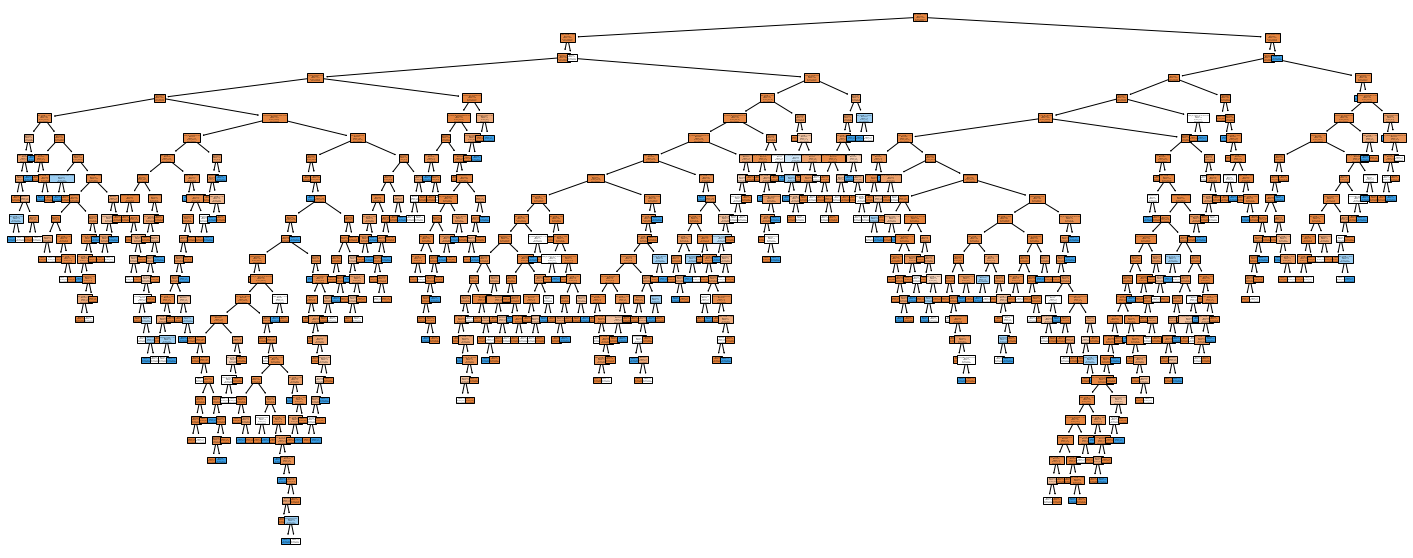

In [12]:
# 3. Visualize a árvore
plt.figure(figsize = (25,10))
plot_tree(clf,
         filled = True,
         class_names = ['Aprovado', 'Reprovado'],
         feature_names = X_train.columns);

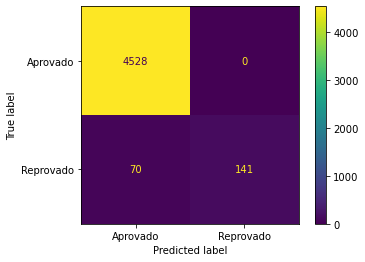

In [14]:
# 4. Produz uma visualização da matriz de classificação (ou matriz de confusão)
# e coloque os rótulos como "aprovados" e "reprovados"
plot_confusion_matrix(clf, X_train, y_train, display_labels = ['Aprovado', 'Reprovado']);

In [20]:
# calculando a acurácia do modelo
predict = clf.predict(X_train)
accuracy_score(y_train, predict)

0.9852289512555391

In [21]:
# outra maneira de calcular a acurácia
clf.score(X_train, y_train)

0.9852289512555391

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [24]:
# 1. Classificando a base de teste
y_teste = clf.predict(X_test)
y_teste

array([False, False, False, ..., False, False, False])

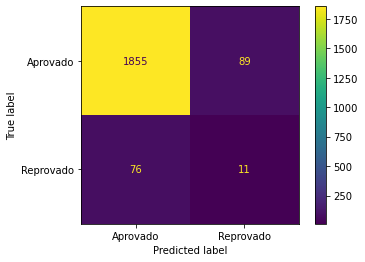

In [25]:
# 2. Produza a visualização da matriz de confusão para a base de teste
plot_confusion_matrix(clf, X_test, y_test, display_labels = ['Aprovado', 'Reprovado']);

In [26]:
# 3. Calcule a acurácia da base de teste
clf.score(X_test, y_test)

0.9187592319054653

In [27]:
# Compare com a acurácia da base de treinamento

A base de dados teve uma acurácia de 98,5% na base de dados treino e 91,8% na base de dados teste

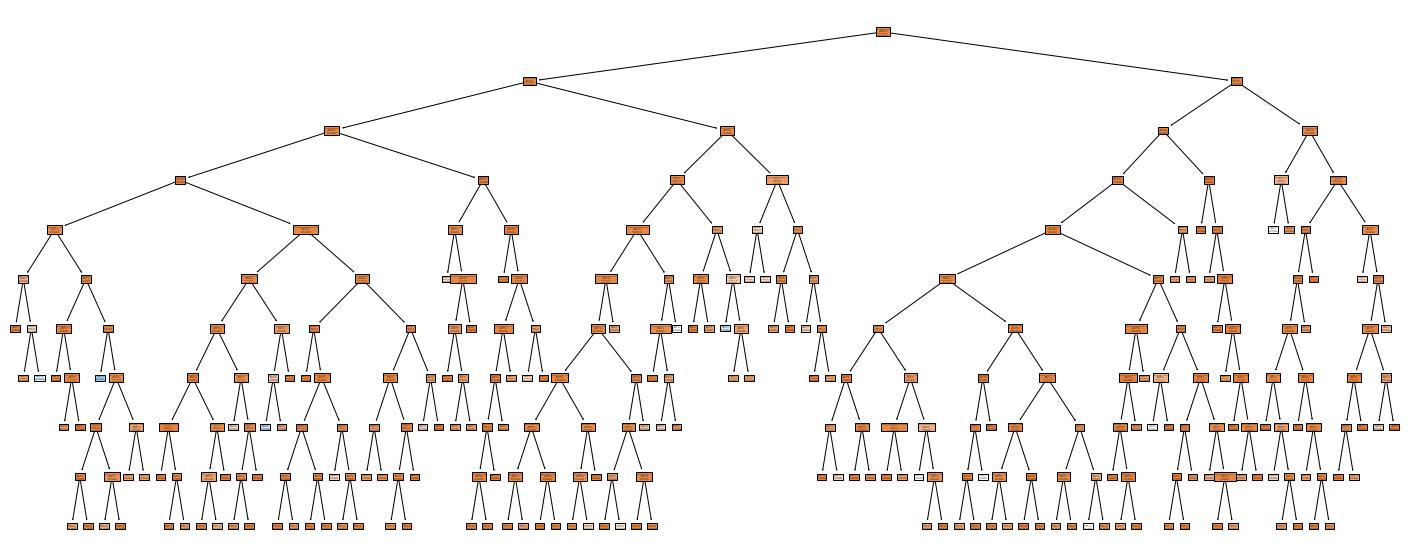

In [28]:
# 4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10
clf_x = DecisionTreeClassifier(min_samples_leaf = 5,
                              max_depth = 10,
                              random_state = 123)

clf_x = clf_x.fit(X_train, y_train)

plt.figure(figsize = (25,10))
plot_tree(clf_x,
         filled = True,
         class_names = ['Aprovado', 'Reprovado'],
         feature_names = X_train.columns);

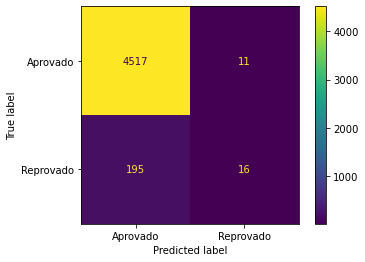

In [31]:
# matriz de confusão da base treino
plot_confusion_matrix(clf_x, X_train, y_train, display_labels = ['Aprovado', 'Reprovado']);

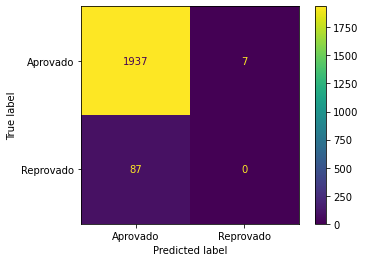

In [32]:
# matriz de confusão da base teste
plot_confusion_matrix(clf_x, X_test, y_test, display_labels = ['Aprovado', 'Reprovado']);

In [33]:
# 5. Calculando a acurácia na base de treino
clf_x.score(X_train, y_train)

0.9565309136948723

In [34]:
# 5. Calculando a acurácia na base de teste
clf_x.score(X_test, y_test)

0.9537173806006893

- Um detalhe importante é a redução da a acurácia entre as bases de treino e teste.

Na arvore sem poda, a acuracia entre os dados de treino e teste foi de 98,5% e 91,8%, respectivamente.

Já na arvore com poda, a acuracia entre os dados de treino e teste foi de 95,6% na base de treino e 95,3% na base de teste.

- Se comparada a arvore sem poda e a arvore com poda, a acuracia dos dados de treino aumentou em comparação com o modelo sem poda. Passou de 91,8% da arvore sem poda, para 95,3% da arvore com poda.